# Importar Librarias y datos

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np   

from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [6]:
df = pd.read_parquet("output_08.parquet")

In [7]:
df.head()

,age,gender,employment_stat,wage_per_hour,working_week_per_year,occupation_code,total_employed,gains,losses,stocks_status,...,tax_status_Otro,tax_status_Single,citizenship_Native,citizenship_Otro,country_of_birth_own_US,migration_code_change_in_msa_MSA to MSA,migration_code_change_in_msa_Otro,migration_code_change_in_msa_unchanged,migration_code_change_in_reg_Otro,migration_code_change_in_reg_unchanged
0,0.853333,1.0,0.0,0.000000,1.000000,0.000000,0.333333,0.0,0.0,0.002916,...,True,False,True,False,True,False,False,False,False,False
1,0.666667,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,False,True,True,False,True,False,False,True,False,True
2,0.080000,0.0,0.0,0.050005,0.288462,0.565217,0.666667,0.0,0.0,0.000000,...,False,True,True,False,True,False,False,True,False,True
4,0.733333,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,False,False,True,False,True,False,False,False,False,False
5,0.400000,0.0,0.0,0.082508,1.000000,0.673913,1.000000,0.0,0.0,0.000000,...,False,False,False,False,False,False,False,True,False,True


In [8]:
df.columns

Index(['age', 'gender', 'employment_stat', 'wage_per_hour',
       'working_week_per_year', 'occupation_code', 'total_employed', 'gains',
       'losses', 'stocks_status', 'income_above_limit',
       'education_secondary_complete', 'education_secondary_incomplete',
       'education_technical_education/university_incomplete',
       'education_university_graduate_or_higher',
       'marital_status_Married-civilian spouse present',
       'marital_status_Never married', 'marital_status_Otro',
       'marital_status_Widowed', 'race_Otro', 'race_White', 'is_hispanic_Otro',
       'employment_commitment_Full-time schedules',
       'employment_commitment_Not in labor force',
       'employment_commitment_Otro',
       'industry_code_main_Manufacturing-durable goods',
       'industry_code_main_Not in universe or children',
       'industry_code_main_Otro', 'industry_code_main_Retail trade',
       'household_stat_Householder', 'household_stat_Nonfamily Householder',
       'household_stat

# Modelo

In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [11]:
X = df.drop("income_above_limit", axis=1)
y = df["income_above_limit"]

X_resampled, y_resampled = SMOTE().fit_resample(X, y)



model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)

importances = model.feature_importances_
feature_names = X.columns

sorted_features = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)
print(sorted_features)


[('stocks_status', 0.16736779580926187), ('age', 0.1440373621647721), ('occupation_code', 0.1287072677428067), ('total_employed', 0.08250509077751642), ('working_week_per_year', 0.07837654248267743), ('education_university_graduate_or_higher', 0.06456175499766847), ('gender', 0.055645639772540556), ('gains', 0.05091785533789992), ('household_stat_Householder', 0.01597346450022014), ('losses', 0.01547317968207469), ('employment_stat', 0.01377655993524215), ('industry_code_main_Not in universe or children', 0.013498745322768214), ('education_secondary_incomplete', 0.012953790197295157), ('industry_code_main_Otro', 0.011012822488310061), ('tax_status_Joint both under 65', 0.010284752873751584), ('wage_per_hour', 0.01008035448333071), ('education_secondary_complete', 0.009905239172837272), ('marital_status_Married-civilian spouse present', 0.008015966348342781), ('education_technical_education/university_incomplete', 0.007672606090379619), ('tax_status_Nonfiler', 0.006666034496816764), ('r

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)  # Apply scaling


In [13]:
rfe = RFE(estimator=LogisticRegression(solver='saga', max_iter=500), n_features_to_select=7)
rfe.fit(X_resampled, y_resampled)

selected_features = X.columns[rfe.support_]
print(selected_features)

Index(['age', 'working_week_per_year', 'gains', 'losses', 'stocks_status',
       'migration_code_change_in_msa_MSA to MSA',
       'migration_code_change_in_reg_Otro'],
      dtype='object')


migration code in msa es un categorica y por eso voy a añadir los de mas y pais de nacimiento

In [34]:
selected = ['age', 'working_week_per_year', 'gains', 'losses', 'stocks_status',
       'migration_code_change_in_msa_MSA to MSA',
       'migration_code_change_in_msa_Otro',
       'migration_code_change_in_msa_unchanged',
       'migration_code_change_in_reg_Otro',
       'migration_code_change_in_reg_unchanged', 'country_of_birth_own_US']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled[selected], y_resampled, test_size=0.2, random_state=42)

# Usando Logistic Regression con solver=saga y k=3

In [52]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f"K value: {k}  Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

K value: 3  Accuracy: 0.9015


Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     29335
         1.0       0.93      0.87      0.90     29392

    accuracy                           0.90     58727
   macro avg       0.90      0.90      0.90     58727
weighted avg       0.90      0.90      0.90     58727



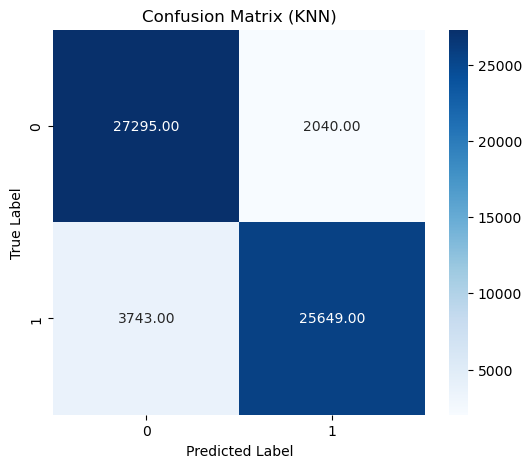

In [53]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True,  fmt='.2f', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix (KNN)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [54]:
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

accuracy = (TN + TP) / (TN + TP + FN + FP)
sensibilidad = TP / (TP + FN)
especificidad = TN / (TN + FP)
npv_value = TN / (TN + FN) if (TN + FN) != 0 else 0

print(f"Accuracy: {accuracy}")
print(f"Sensibilidad: {sensibilidad}")
print(f"Especificidad: {especificidad}")
print(f"Negative Predictive Value (NPV): {npv_value}")

Accuracy: 0.9015274064740239
Sensibilidad: 0.8726524224278716
Especificidad: 0.9304584966763252
Negative Predictive Value (NPV): 0.8794058895547393


# Variación del umbral (Threshold)

In [61]:
y_probs = knn.predict_proba(X_test)[:, 1]  # Probability of positive class (1)


## Probando Umbral en un grafico

In [63]:
threshold = 0.6  # Example: Increasing threshold to favor precision over recall
y_pred_new = (y_probs >= threshold).astype(int)


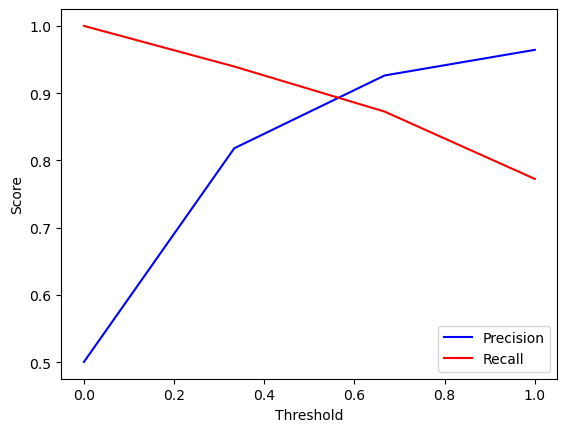

In [65]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(thresholds, precision[:-1], "b-", label="Precision")
plt.plot(thresholds, recall[:-1], "r-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.show()


In [83]:
y_pred_graph = (y_probs >= 0.55).astype(int)


In [85]:
print(classification_report(y_test, y_pred_graph))


              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     29335
         1.0       0.93      0.87      0.90     29392

    accuracy                           0.90     58727
   macro avg       0.90      0.90      0.90     58727
weighted avg       0.90      0.90      0.90     58727



## Probar un rango de umbral usando f1 score

In [87]:
from sklearn.metrics import f1_score

best_threshold = 0.5  # Default
best_f1 = 0

for threshold in np.arange(0.1, 0.9, 0.05):
    y_pred_adj = (y_probs >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_adj)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Best Threshold: {best_threshold}, Best F1-Score: {best_f1}")


Best Threshold: 0.3500000000000001, Best F1-Score: 0.8986878295755155


In [89]:
y_pred_final = (y_probs >= best_threshold).astype(int)


In [91]:
print(classification_report(y_test, y_pred_final))


              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     29335
         1.0       0.93      0.87      0.90     29392

    accuracy                           0.90     58727
   macro avg       0.90      0.90      0.90     58727
weighted avg       0.90      0.90      0.90     58727



## Curva ROC

In [118]:
from sklearn.metrics import roc_curve, roc_auc_score

In [101]:
# con la función roc_curve automaticamente calcula los valores de
# sensibilidad y 1-especificidad para distintos thresholds
y_probs = knn.predict_proba(X_test)[:, 1]
especificidad_inv, sensibilidad, threshold = roc_curve(y_test, y_probs)

In [103]:
threshold

array([       inf, 1.        , 0.66666667, 0.33333333, 0.        ])

In [111]:
# Find the index of the threshold closest to 0.5
threshold_index = np.argmin(np.abs(thresholds - 0.5))

# Now print the values for that threshold
print(f"Threshold = {thresholds[threshold_index]}")
print(f"Sensibilidad = {sensibilidad[threshold_index]}")  # Sensitivity (True Positive Rate)
print(f"Especificidad = {1 - especificidad}")  # Specificity = 1 - False Positive Rate


Threshold = 0.6666666666666666
Sensibilidad = 0.8726524224278716
Especificidad = 0.06954150332367481


<Axes: >

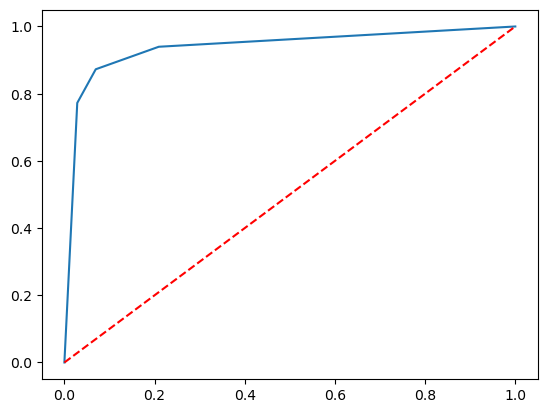

In [113]:
recta_x = [i * 0.01 for i in range(101)]
recta_y = recta_x
sns.lineplot(x = especificidad_inv, y = sensibilidad)
sns.lineplot(x = recta_x, y = recta_y, ls = "--", c = "r")

### Calcular área abajo de la curva

In [120]:
roc_auc_score(y_test, y_probs)

0.9382340326938667